In [1]:
#Import code from last time
%run NI6-1.ipynb

Optimization terminated successfully.
         Current function value: 0.966958
         Iterations: 70
         Function evaluations: 72
         Gradient evaluations: 72


<Figure size 640x480 with 1 Axes>

Optimization terminated successfully.
         Current function value: 0.820534
         Iterations: 67
         Function evaluations: 75
         Gradient evaluations: 75


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.49627058, 0.93614647, 0.85846731, 0.70258153, 0.6646853 ,
        0.38417609],
       [0.47546339, 0.85846731, 0.70258153, 0.6646853 , 0.38417609,
        0.50844449],
       [0.55155979, 0.70258153, 0.6646853 , 0.38417609, 0.50844449,
        0.70605062],
       [0.50099435, 0.6646853 , 0.38417609, 0.50844449, 0.70605062,
        0.62566313],
       [0.44545859, 0.38417609, 0.50844449, 0.70605062, 0.62566313,
        0.31006745],
       [0.50571167, 0.50844449, 0.70605062, 0.62566313, 0.31006745,
        0.71815185],
       [0.46588904, 0.70605062, 0.62566313, 0.31006745, 0.71815185,
        0.58129533],
       [0.46785659, 0.62566313, 0.31006745, 0.71815185, 0.58129533,
        0.59084039],
       [0.45300142, 0.31006745, 0.71815185, 0.58129533, 0.59084039,
        0.64112187],
       [0.43741172, 0.71815185, 0.58129533, 0.59084039, 0.64112187,
        0.70009636],
       [0.3506737 , 0.58129533, 0.59084039, 0.64112187, 0.70009636,
        0.61497185],
       [0.36403131, 0

In [3]:
testY

array([[0.50844449],
       [0.70605062],
       [0.62566313],
       [0.31006745],
       [0.71815185],
       [0.58129533],
       [0.59084039],
       [0.64112187],
       [0.70009636],
       [0.61497185],
       [0.591378  ],
       [0.32      ]])

In [4]:
trainX

array([[0.2232566 , 0.42336055, 0.31155855, 0.42299539, 0.42478065,
        0.32205711],
       [0.24197469, 0.31155855, 0.42299539, 0.42478065, 0.32205711,
        0.46046559],
       [0.36573346, 0.42299539, 0.42478065, 0.32205711, 0.46046559,
        0.16668864],
       [0.55255899, 0.42478065, 0.32205711, 0.46046559, 0.16668864,
        0.40174469],
       [0.37002352, 0.32205711, 0.46046559, 0.16668864, 0.40174469,
        0.31647817],
       [0.3325317 , 0.46046559, 0.16668864, 0.40174469, 0.31647817,
        0.27086271],
       [0.38788752, 0.16668864, 0.40174469, 0.31647817, 0.27086271,
        0.31251205],
       [0.39836394, 0.40174469, 0.31647817, 0.27086271, 0.31251205,
        0.36909266],
       [0.2848263 , 0.31647817, 0.27086271, 0.31251205, 0.36909266,
        0.20575138],
       [0.18673502, 0.27086271, 0.31251205, 0.36909266, 0.20575138,
        0.17619313],
       [0.18269477, 0.31251205, 0.36909266, 0.20575138, 0.17619313,
        0.29041944],
       [0.255617  , 0

In [5]:
trainY

array([[0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.6646853 ],
       [0.38417609]])

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 6
        self.outputLayerSize = 1
        self.hiddenLayerSize = 1
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

9.403120219821748e-11

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.019623
         Iterations: 46
         Function evaluations: 54
         Gradient evaluations: 54


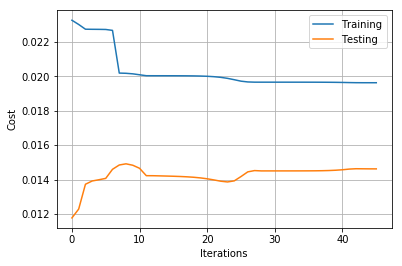

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.02325022]),
 array([0.02300465]),
 array([0.02272966]),
 array([0.0227245]),
 array([0.02272113]),
 array([0.02271468]),
 array([0.02266138]),
 array([0.02018269]),
 array([0.02017019]),
 array([0.02013881]),
 array([0.02008419]),
 array([0.02002973]),
 array([0.02002848]),
 array([0.02002826]),
 array([0.02002788]),
 array([0.02002716]),
 array([0.02002584]),
 array([0.02002338]),
 array([0.02001886]),
 array([0.02001073]),
 array([0.01999657]),
 array([0.01997294]),
 array([0.0199353]),
 array([0.01987728]),
 array([0.01979795]),
 array([0.01971322]),
 array([0.01966842]),
 array([0.01965546]),
 array([0.01965475]),
 array([0.01965474]),
 array([0.01965471]),
 array([0.01965467]),
 array([0.0196546]),
 array([0.01965445]),
 array([0.01965418]),
 array([0.0196537]),
 array([0.01965285]),
 array([0.0196514]),
 array([0.01964906]),
 array([0.01964536]),
 array([0.01963954]),
 array([0.01963113]),
 array([0.01962492]),
 array([0.01962276]),
 array([0.01962255]),
 array([0.01962

In [17]:
T.testJ

[array([0.01177427]),
 array([0.01228799]),
 array([0.01372882]),
 array([0.0139194]),
 array([0.01399097]),
 array([0.01406948]),
 array([0.0145963]),
 array([0.01484671]),
 array([0.01491449]),
 array([0.01483227]),
 array([0.01465517]),
 array([0.01422599]),
 array([0.0142241]),
 array([0.01421451]),
 array([0.01420442]),
 array([0.01419317]),
 array([0.01417918]),
 array([0.01416046]),
 array([0.01413432]),
 array([0.01409729]),
 array([0.01404578]),
 array([0.01397884]),
 array([0.01390598]),
 array([0.01386249]),
 array([0.01392429]),
 array([0.01417615]),
 array([0.01444773]),
 array([0.01452216]),
 array([0.01450318]),
 array([0.01450359]),
 array([0.01450362]),
 array([0.01450377]),
 array([0.01450401]),
 array([0.01450444]),
 array([0.01450524]),
 array([0.01450674]),
 array([0.01450963]),
 array([0.01451511]),
 array([0.01452525]),
 array([0.01454269]),
 array([0.0145699]),
 array([0.01460906]),
 array([0.01462966]),
 array([0.01462596]),
 array([0.01462263]),
 array([0.0146

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.006019541744209735

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.42729535],
       [0.4235993 ],
       [0.42181518],
       [0.40411653],
       [0.39048562],
       [0.39642385],
       [0.38261562],
       [0.38755134],
       [0.38762799],
       [0.37021395],
       [0.34129573],
       [0.33764328],
       [0.3415291 ],
       [0.35435399],
       [0.36695361],
       [0.34536364],
       [0.34914779],
       [0.37524121],
       [0.38130991],
       [0.41153413],
       [0.42543381],
       [0.42536974],
       [0.41772899],
       [0.42261688],
       [0.43141501],
       [0.43492825],
       [0.42539141],
       [0.42609669],
       [0.4492178 ],
       [0.45279358],
       [0.46619566],
       [0.47607612],
       [0.48256671],
       [0.4853741 ],
       [0.48396652],
       [0.48262674],
       [0.48730407],
       [0.49062837],
       [0.48750254],
       [0.48897007],
       [0.49316442],
       [0.49199866],
       [0.49410368],
       [0.4945834 ],
       [0.49310873],
       [0.48952991],
       [0.47801847],
       [0.467

In [21]:
y

array([[0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.6646853 ],
       [0.38417609],
       [0.50844449],
       [0.70605062],
       [0.625

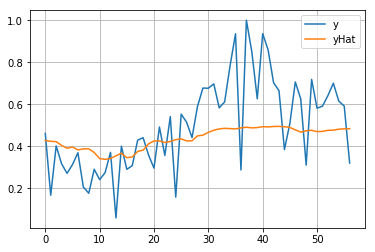

In [22]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [23]:
prediksi=NN.forward(dataprediksi)

In [24]:
prediksi

array([[0.47935855],
       [0.46645319],
       [0.45140478],
       [0.43536424]])

In [25]:
from sklearn.metrics import mean_squared_error 

In [26]:
Y_true= ([	0.50	]	,
[	0.415539889	]	,
[	0	]	,
[	0.235502358	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.06168232061502174

In [27]:
dataprediksi

array([[0.79538041, 0.64112187, 0.70009636, 0.61497185, 0.591378  ,
        0.32      ],
       [1.        , 0.70009636, 0.61497185, 0.591378  , 0.32      ,
        0.5       ],
       [0.70768171, 0.61497185, 0.591378  , 0.32      , 0.5       ,
        0.41553989],
       [0.49169532, 0.591378  , 0.32      , 0.5       , 0.41553989,
        0.        ]])

In [28]:
z=np.array([0.51319034])

In [29]:
y=np.array([0.32	,	0.50	,	0.415539889	,	0	,	0.235502358	])

In [30]:
a=np.concatenate((z,y))

In [31]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.3730026])

In [32]:
#prediksi 2
c=prediksi
z1=np.array([0.48673204])
b=y[1:]
d=np.concatenate((z1,b,c))
prediksi=NN.forward(d)
prediksi

array([0.32886812])

In [33]:
#prediksi 3
c=prediksi
z2=np.array([0.43012934])
b=y[1:]
d=np.concatenate((z2,b,c))
prediksi=NN.forward(d)
prediksi

array([0.32577576])

In [34]:
#prediksi 4
c=prediksi
z3=np.array([0.41357631])
b=y[1:]
d=np.concatenate((z3,b,c))
prediksi=NN.forward(d)
prediksi

array([0.32544731])

In [35]:
#prediksi 5
c=prediksi
z4=np.array([0.41626853])
b=y[1:]
d=np.concatenate((z4,b,c))
prediksi=NN.forward(d)
prediksi

array([0.32545153])

In [36]:
#prediksi 6
c=prediksi
z5=np.array([0.41314695])
b=y[1:]
d=np.concatenate((z5,b,c))
prediksi=NN.forward(d)
prediksi

array([0.32542434])